<a href="https://www.kaggle.com/code/mazensafty/charity-donor-predictor?scriptVersionId=199938940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

# Data Exploration (EDA)

In [2]:
data = pd.read_csv("census.csv")
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 45222 entries, 0 to 45221

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   age              45222 non-null  int64  

 1   workclass        45222 non-null  object 

 2   education_level  45222 non-null  object 

 3   education-num    45222 non-null  float64

 4   marital-status   45222 non-null  object 

 5   occupation       45222 non-null  object 

 6   relationship     45222 non-null  object 

 7   race             45222 non-null  object 

 8   sex              45222 non-null  object 

 9   capital-gain     45222 non-null  float64

 10  capital-loss     45222 non-null  float64

 11  hours-per-week   45222 non-null  float64

 12  native-country   45222 non-null  object 

 13  income           45222 non-null  object 

dtypes: float64(4), int64(1), object(9)

memory usage: 4.8+ MB


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
numeric = data.select_dtypes(include = ["int64" , "float64"])

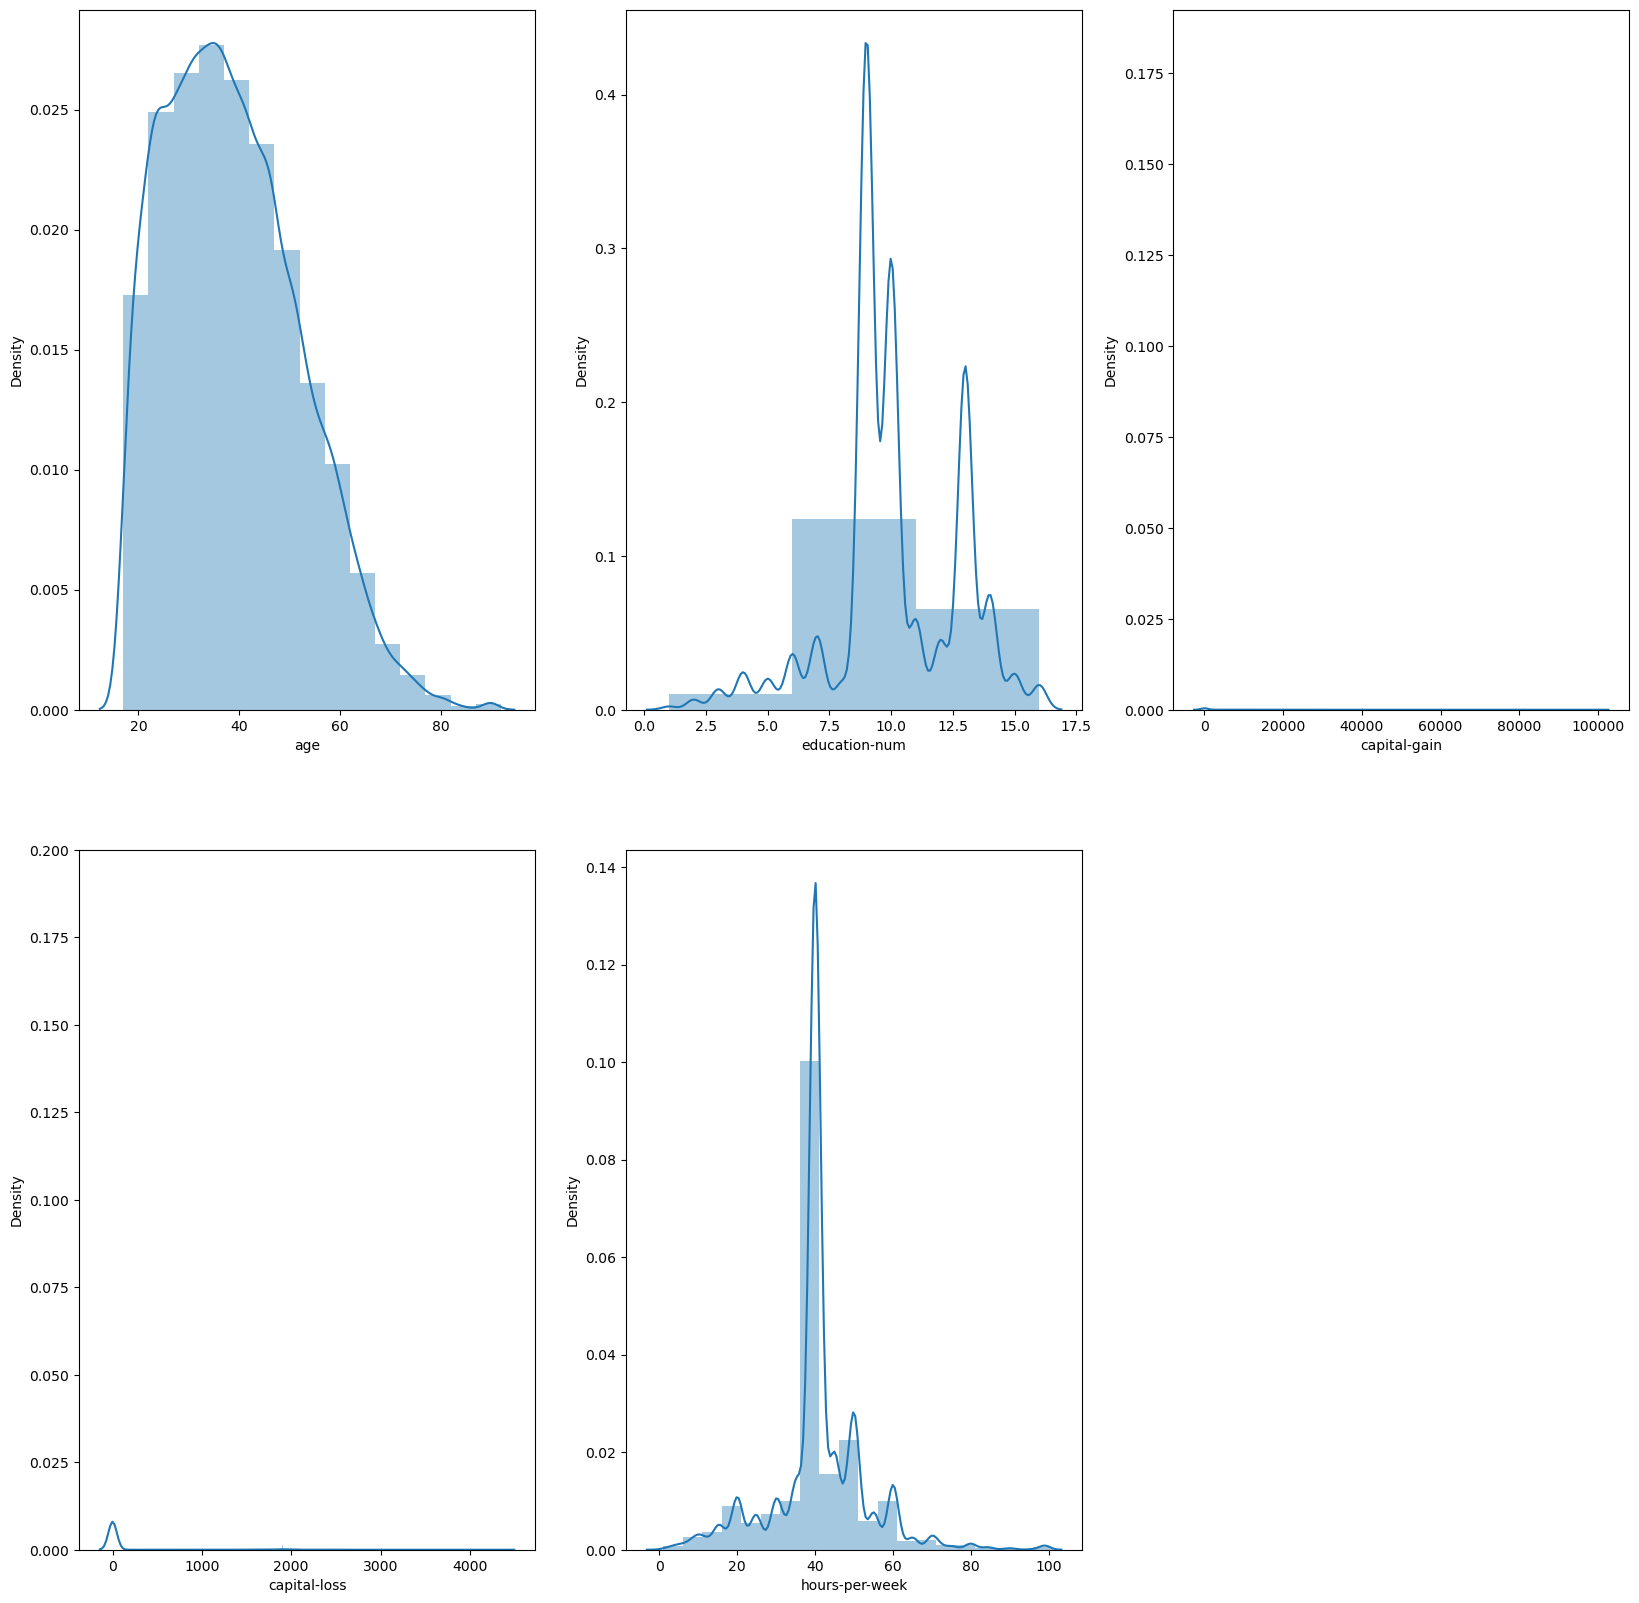

In [6]:
plt.figure(figsize = [20,20])

for i in range(len(numeric.columns)):
    plt.subplot(2 , 3 , i + 1)
    bins = np.arange(data[numeric.columns[i]].min() , data[numeric.columns[i]].max() + 5 , 5)
    sns.distplot(data[numeric.columns[i]] , bins = bins);

# Data Cleaning and Preprocessing

## Hundle Missing Values

In [7]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Correct Format

In [3]:
label = LabelEncoder()

data["income"] = label.fit_transform(data["income"])
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


In [4]:
obj = data.select_dtypes(include = ["object"])

In [5]:
for col in obj.columns:
    data[col] = data[col].str.strip()

# Data Analysis

In [11]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


In [12]:
data_more_50 = data[data["income"] == 1]
data_below_50 = data[data["income"] == 0]

data_more_50.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1
10,37,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,1
11,30,State-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,1


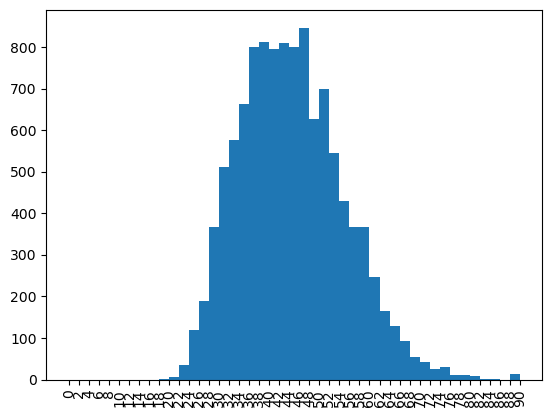

In [13]:
bins = np.arange(0 , data_more_50["age"].max() + 2 , 2)
plt.hist(data = data_more_50 , x = "age" , bins = bins)
plt.xticks(rotation = 90)
plt.xticks(bins);

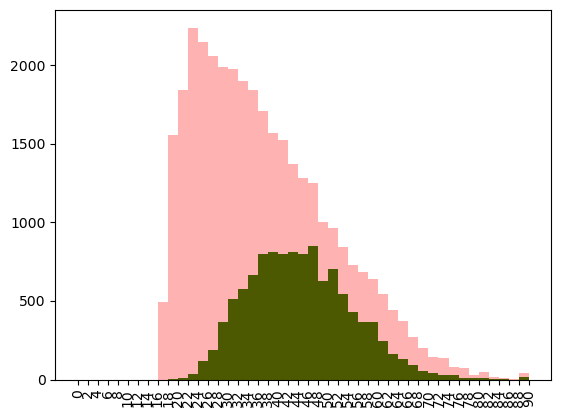

In [14]:
plt.hist(data = data_more_50 , x = "age" , bins = bins , color = "green")
plt.hist(data = data_below_50 , x = "age" , bins = bins , color = "red" , alpha = 0.3)
plt.xticks(rotation = 90)
plt.xticks(bins);

In [15]:
data_more_50["age"].mean()

44.00606709493219

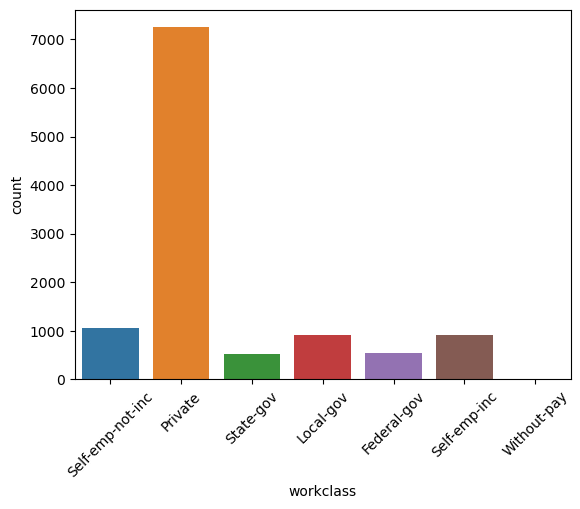

In [16]:
sns.countplot(data = data_more_50 , x = "workclass")
plt.xticks(rotation = 45);

42.86429458005792

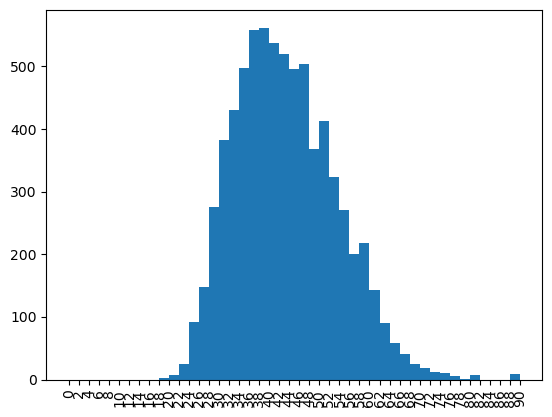

In [17]:
data_more_50_private = data_more_50[data_more_50["workclass"] == "Private"]
bins = np.arange(0 , data_more_50_private["age"].max() + 2 , 2)
plt.hist(data = data_more_50_private , x = "age" , bins = bins)
plt.xticks(rotation = 90)
plt.xticks(bins);
data_more_50_private["age"].mean()

57.0

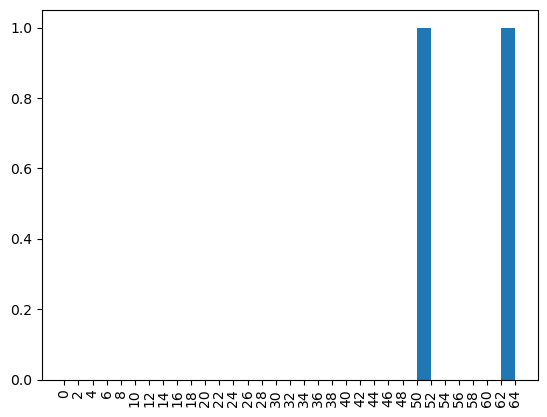

In [18]:
data_more_50_out = data_more_50[data_more_50["workclass"] == "Without-pay"]
bins = np.arange(0 , data_more_50_out["age"].max() + 2 , 2)
plt.hist(data = data_more_50_out , x = "age" , bins = bins)
plt.xticks(rotation = 90)
plt.xticks(bins);
data_more_50_out["age"].mean()

46.67327667610954

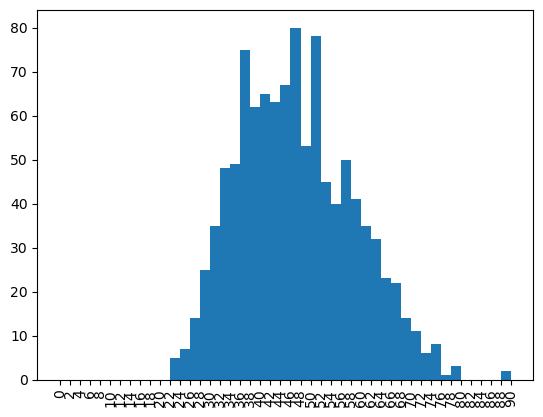

In [19]:
data_more_50_not = data_more_50[data_more_50["workclass"] == "Self-emp-not-inc"]
bins = np.arange(0 , data_more_50_not["age"].max() + 2 , 2)
plt.hist(data = data_more_50_not , x = "age" , bins = bins)
plt.xticks(rotation = 90)
plt.xticks(bins);
data_more_50_not["age"].mean()

47.89912280701754

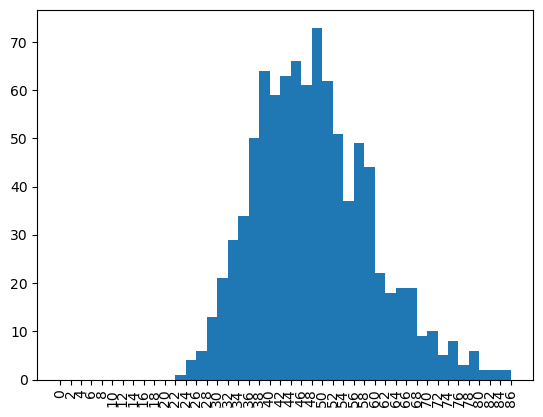

In [20]:
data_more_50_inc = data_more_50[data_more_50["workclass"] == "Self-emp-inc"]
bins = np.arange(0 , data_more_50_inc["age"].max() + 2 , 2)
plt.hist(data = data_more_50_inc , x = "age" , bins = bins)
plt.xticks(rotation = 90)
plt.xticks(bins);
data_more_50_inc["age"].mean()

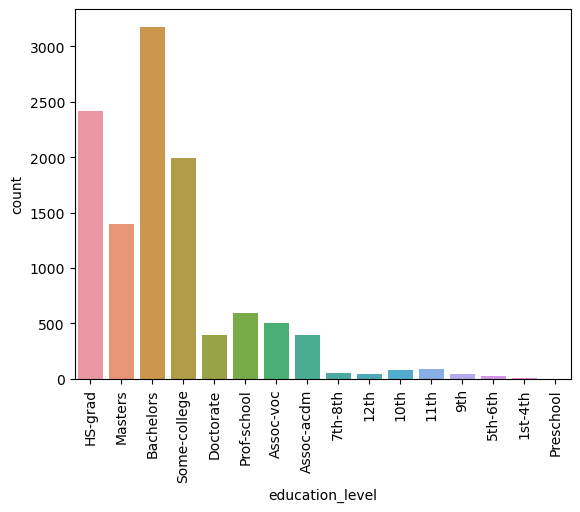

In [21]:
sns.countplot(data = data_more_50 , x = "education_level")
plt.xticks(rotation = 90);

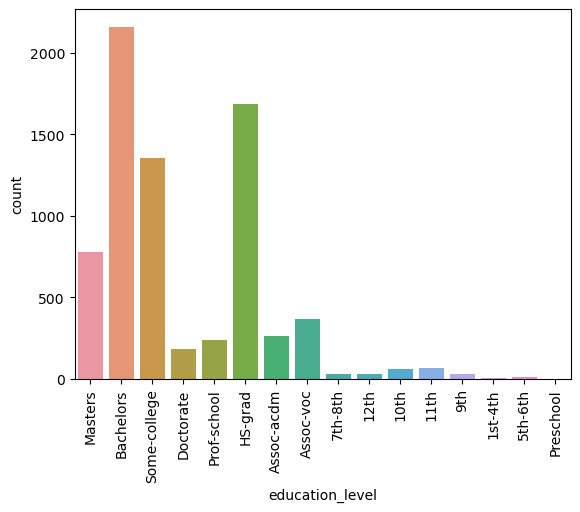

In [22]:
sns.countplot(data = data_more_50_private , x = "education_level")
plt.xticks(rotation = 90);

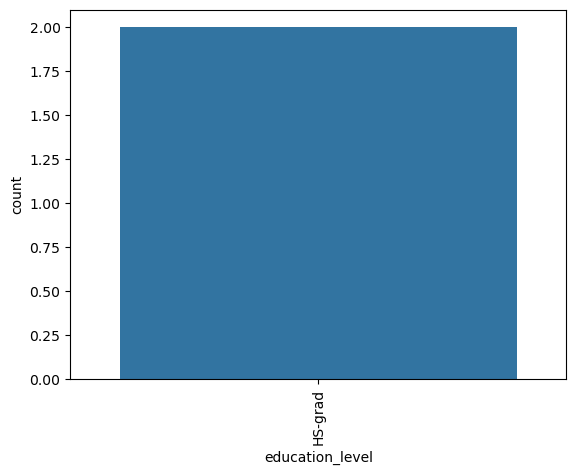

In [23]:
sns.countplot(data = data_more_50_out , x = "education_level")
plt.xticks(rotation = 90);

In [24]:
edu_num = data_more_50_private["education-num"].value_counts().sort_values(ascending = False)

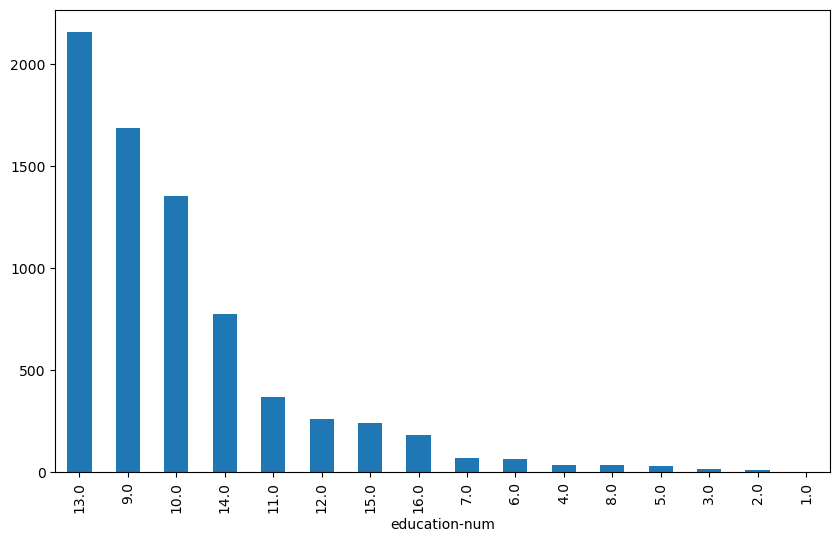

In [25]:
edu_num.plot(kind = "bar" , figsize = [10,6]);

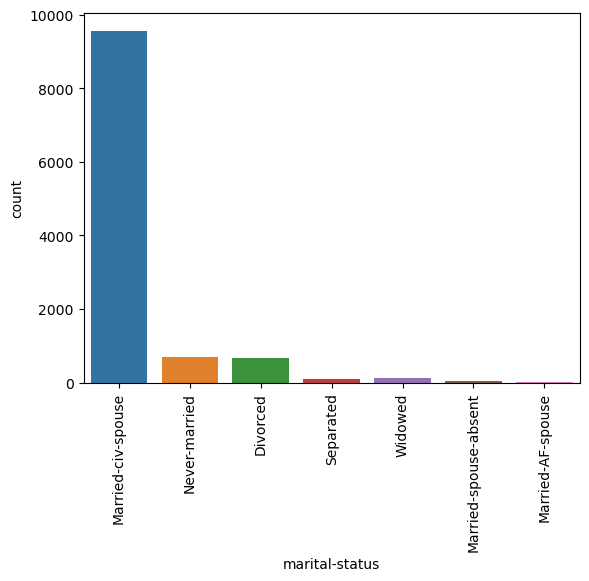

In [26]:
sns.countplot(data = data_more_50 , x = "marital-status")
plt.xticks(rotation = 90);

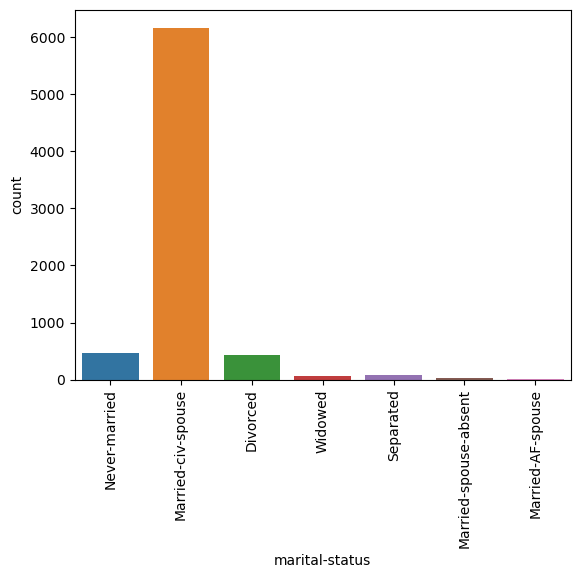

In [27]:
sns.countplot(data = data_more_50_private , x = "marital-status")
plt.xticks(rotation = 90);

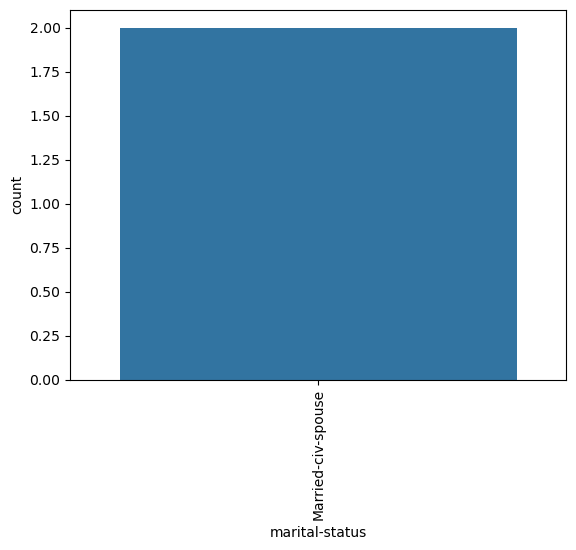

In [28]:
sns.countplot(data = data_more_50_out , x = "marital-status")
plt.xticks(rotation = 90);

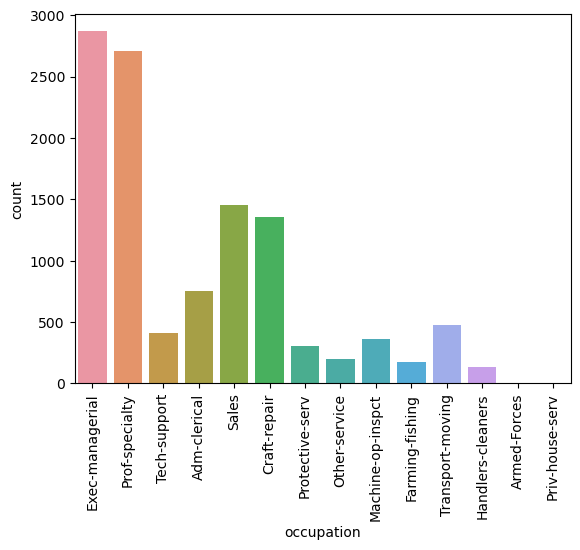

In [29]:
sns.countplot(data = data_more_50 , x = "occupation")
plt.xticks(rotation = 90);

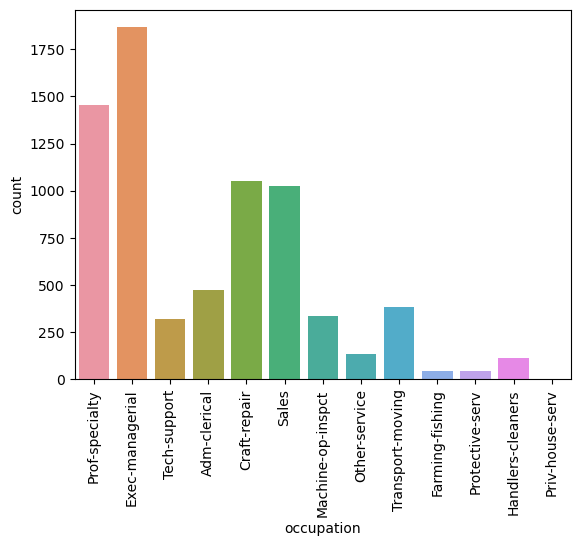

In [30]:
sns.countplot(data = data_more_50_private , x = "occupation")
plt.xticks(rotation = 90);

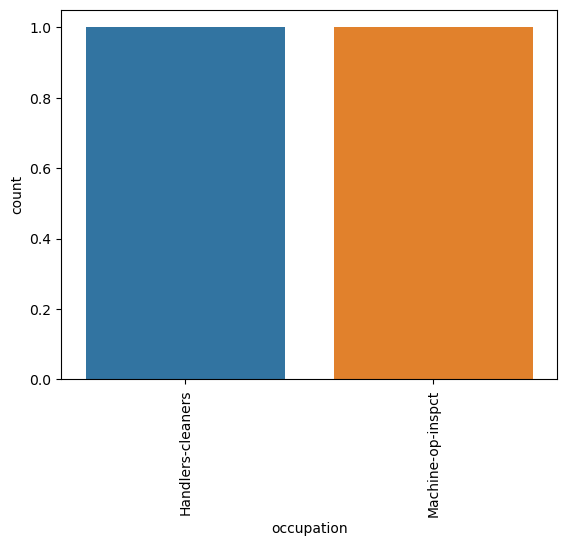

In [31]:
sns.countplot(data = data_more_50_out , x = "occupation")
plt.xticks(rotation = 90);

In [32]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


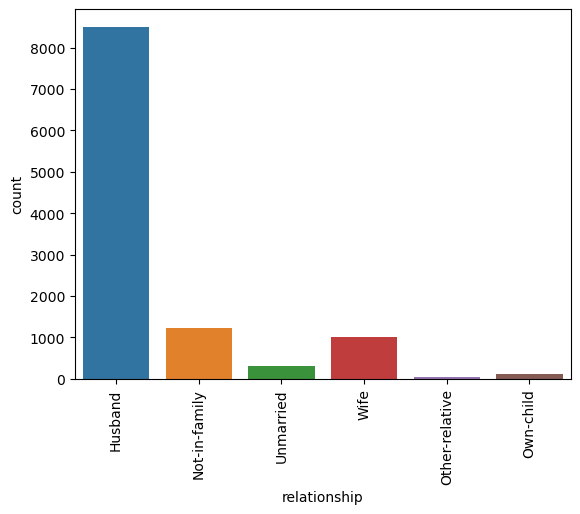

In [33]:
sns.countplot(data = data_more_50 , x = "relationship")
plt.xticks(rotation = 90);

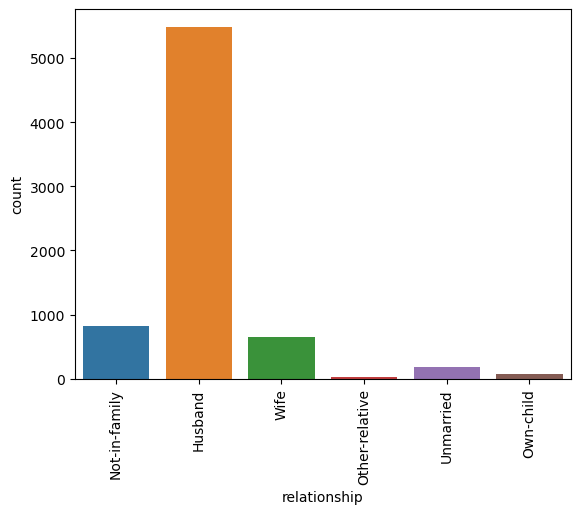

In [34]:
sns.countplot(data = data_more_50_private , x = "relationship")
plt.xticks(rotation = 90);

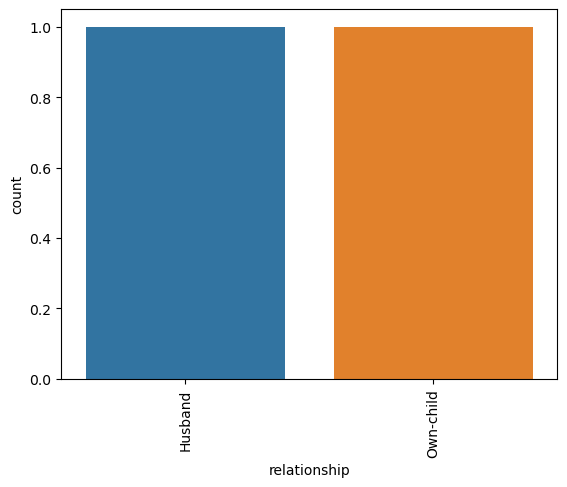

In [35]:
sns.countplot(data = data_more_50_out , x = "relationship")
plt.xticks(rotation = 90);

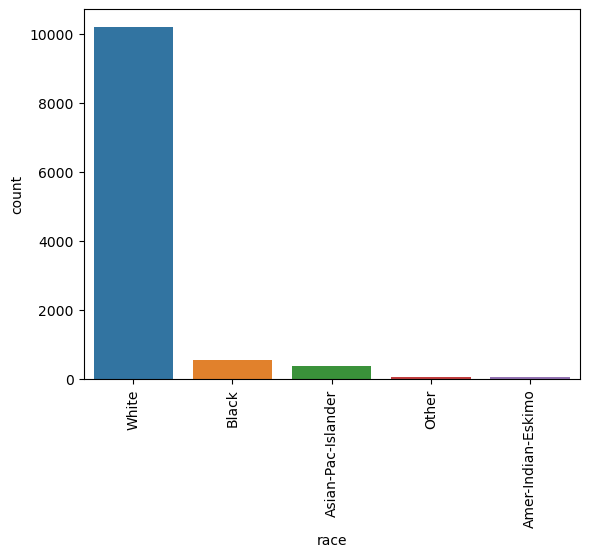

In [36]:
sns.countplot(data = data_more_50 , x = "race")
plt.xticks(rotation = 90);

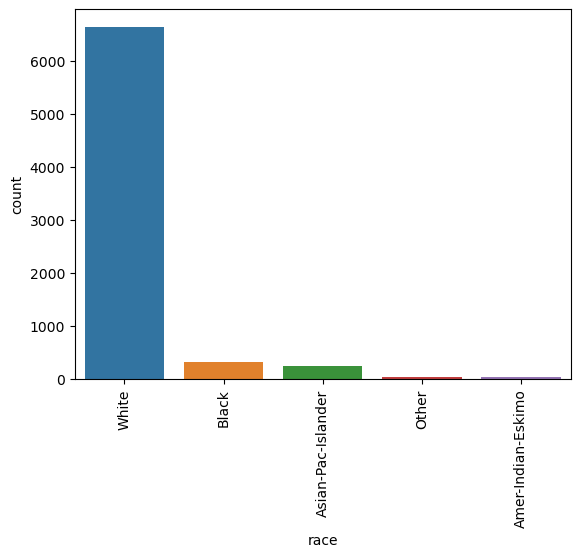

In [37]:
sns.countplot(data = data_more_50_private , x = "race")
plt.xticks(rotation = 90);

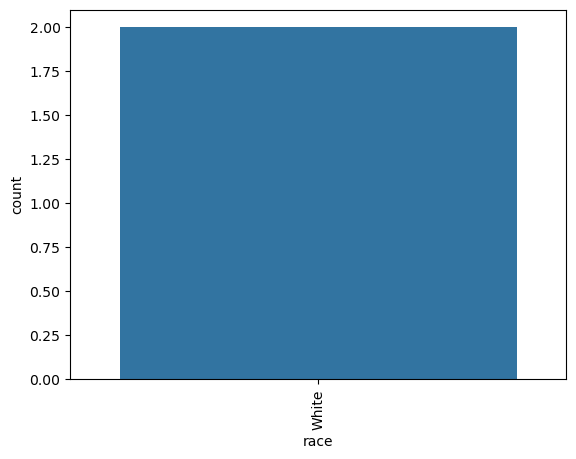

In [38]:
sns.countplot(data = data_more_50_out , x = "race")
plt.xticks(rotation = 90);

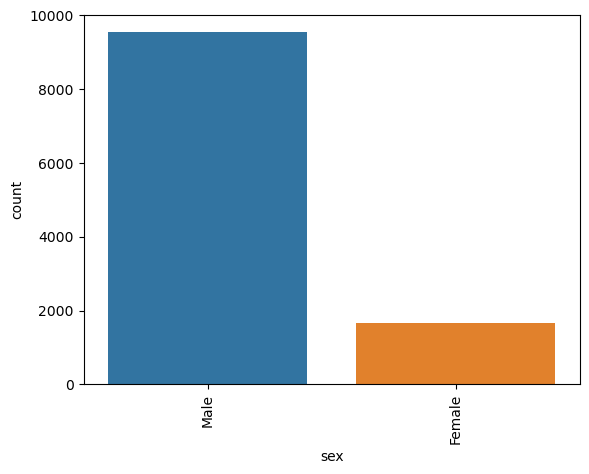

In [39]:
sns.countplot(data = data_more_50 , x = "sex")
plt.xticks(rotation = 90);

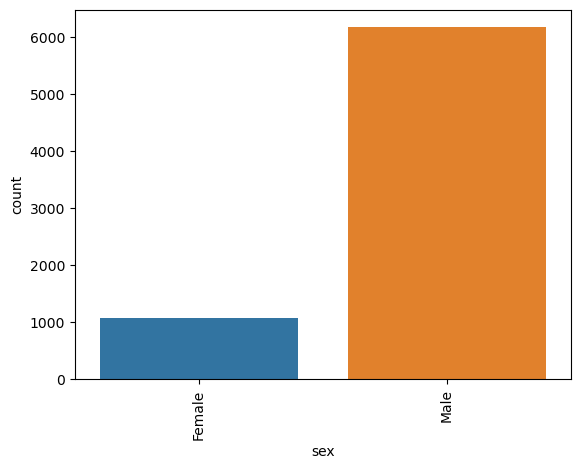

In [40]:
sns.countplot(data = data_more_50_private , x = "sex")
plt.xticks(rotation = 90);

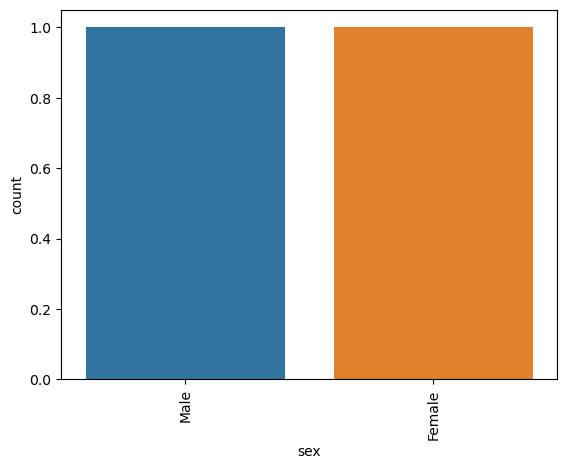

In [41]:
sns.countplot(data = data_more_50_out , x = "sex")
plt.xticks(rotation = 90);

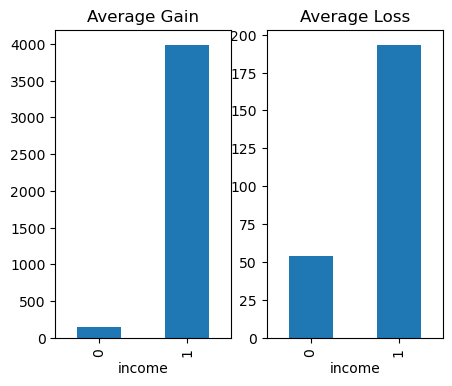

In [42]:
gain = data.groupby(data["income"])["capital-gain"].mean()
loss = data.groupby(data["income"])["capital-loss"].mean()

plt.figure(figsize = [5,4])

plt.subplot(1 , 2 , 1)
gain.plot(kind = "bar")
plt.title("Average Gain");

plt.subplot(1 , 2 , 2)
loss.plot(kind = "bar")
plt.title("Average Loss");

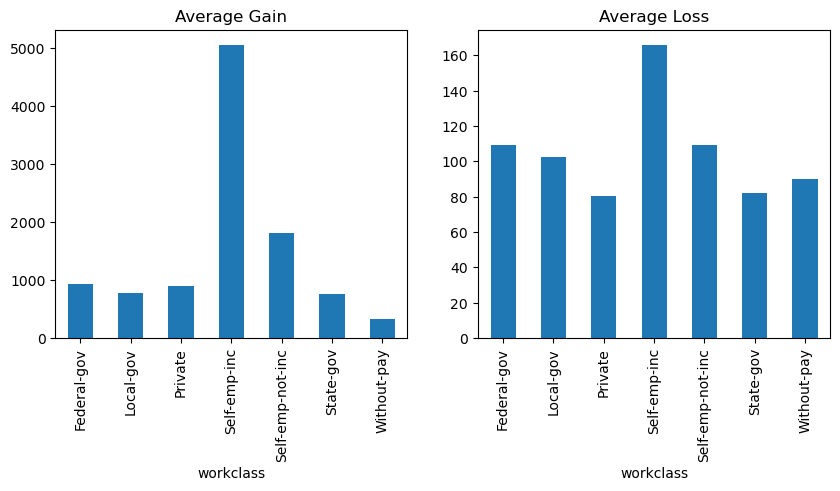

In [43]:
gain = data.groupby(data["workclass"])["capital-gain"].mean()
loss = data.groupby(data["workclass"])["capital-loss"].mean()

plt.figure(figsize = [10,4])

plt.subplot(1 , 2 , 1)
gain.plot(kind = "bar")
plt.title("Average Gain");

plt.subplot(1 , 2 , 2)
loss.plot(kind = "bar")
plt.title("Average Loss");

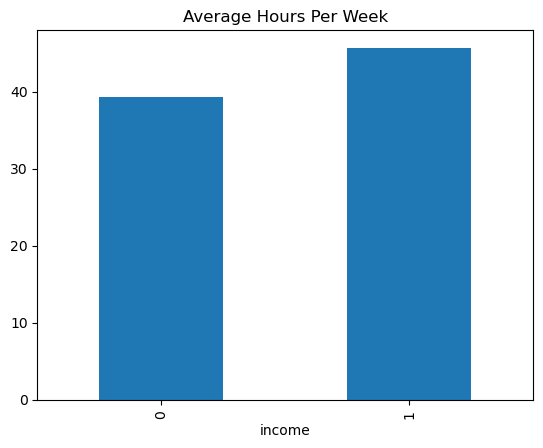

In [44]:
hours = data.groupby(data["income"])["hours-per-week"].mean()

hours.plot(kind = "bar")
plt.title("Average Hours Per Week");

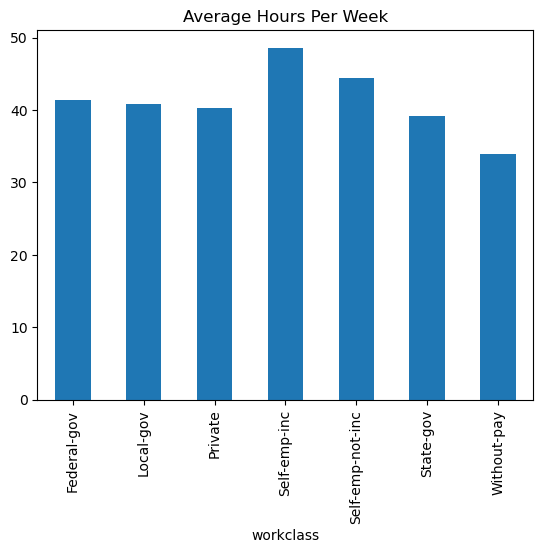

In [45]:
hours = data.groupby(data["workclass"])["hours-per-week"].mean()

hours.plot(kind = "bar")
plt.title("Average Hours Per Week");

In [46]:
data_more_50["hours-per-week"].mean()

45.69048893647395

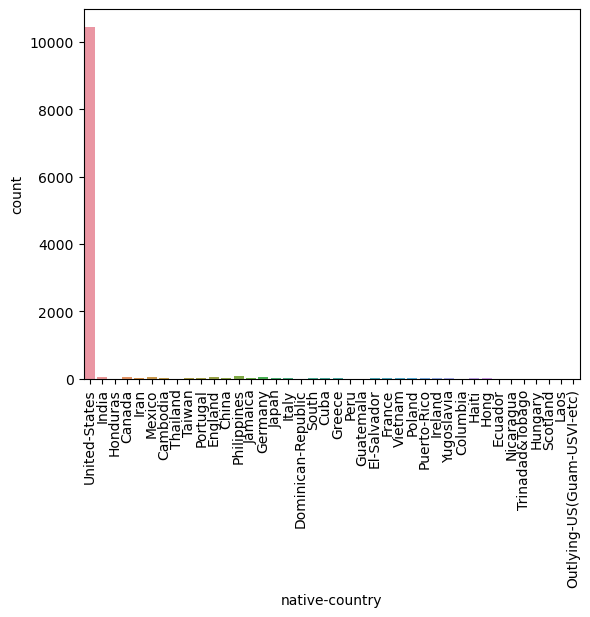

In [47]:
sns.countplot(data = data_more_50 , x = "native-country")
plt.xticks(rotation = 90);

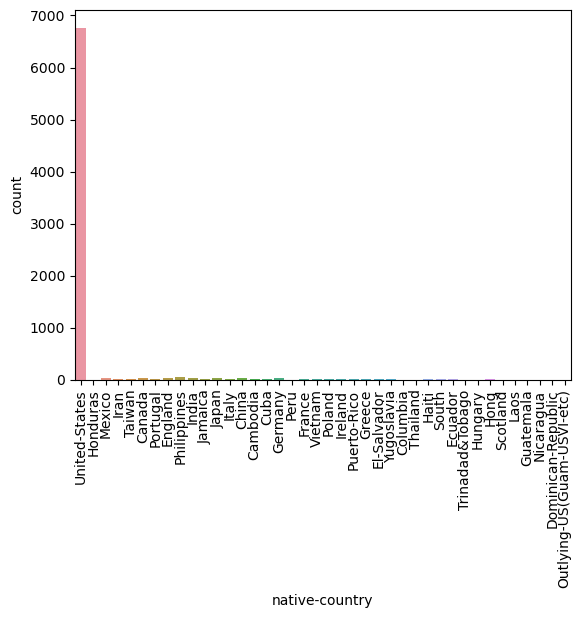

In [48]:
sns.countplot(data = data_more_50_private , x = "native-country")
plt.xticks(rotation = 90);

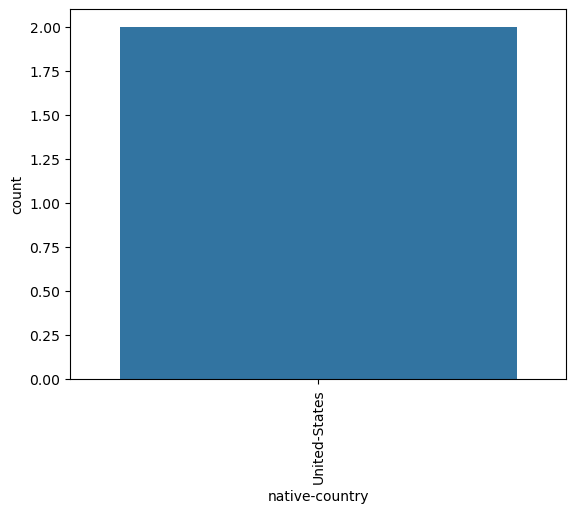

In [49]:
sns.countplot(data = data_more_50_out , x = "native-country")
plt.xticks(rotation = 90);

In [50]:
print(data_more_50["capital-gain"].mean())
print(data_more_50["capital-loss"].mean())

3991.7916666666665

193.48706281227695


# Prepare Data For ML

In [51]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


## Skweed Data

In [6]:
numeric = data.select_dtypes(include = ["int64" , "float64"])
numeric.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


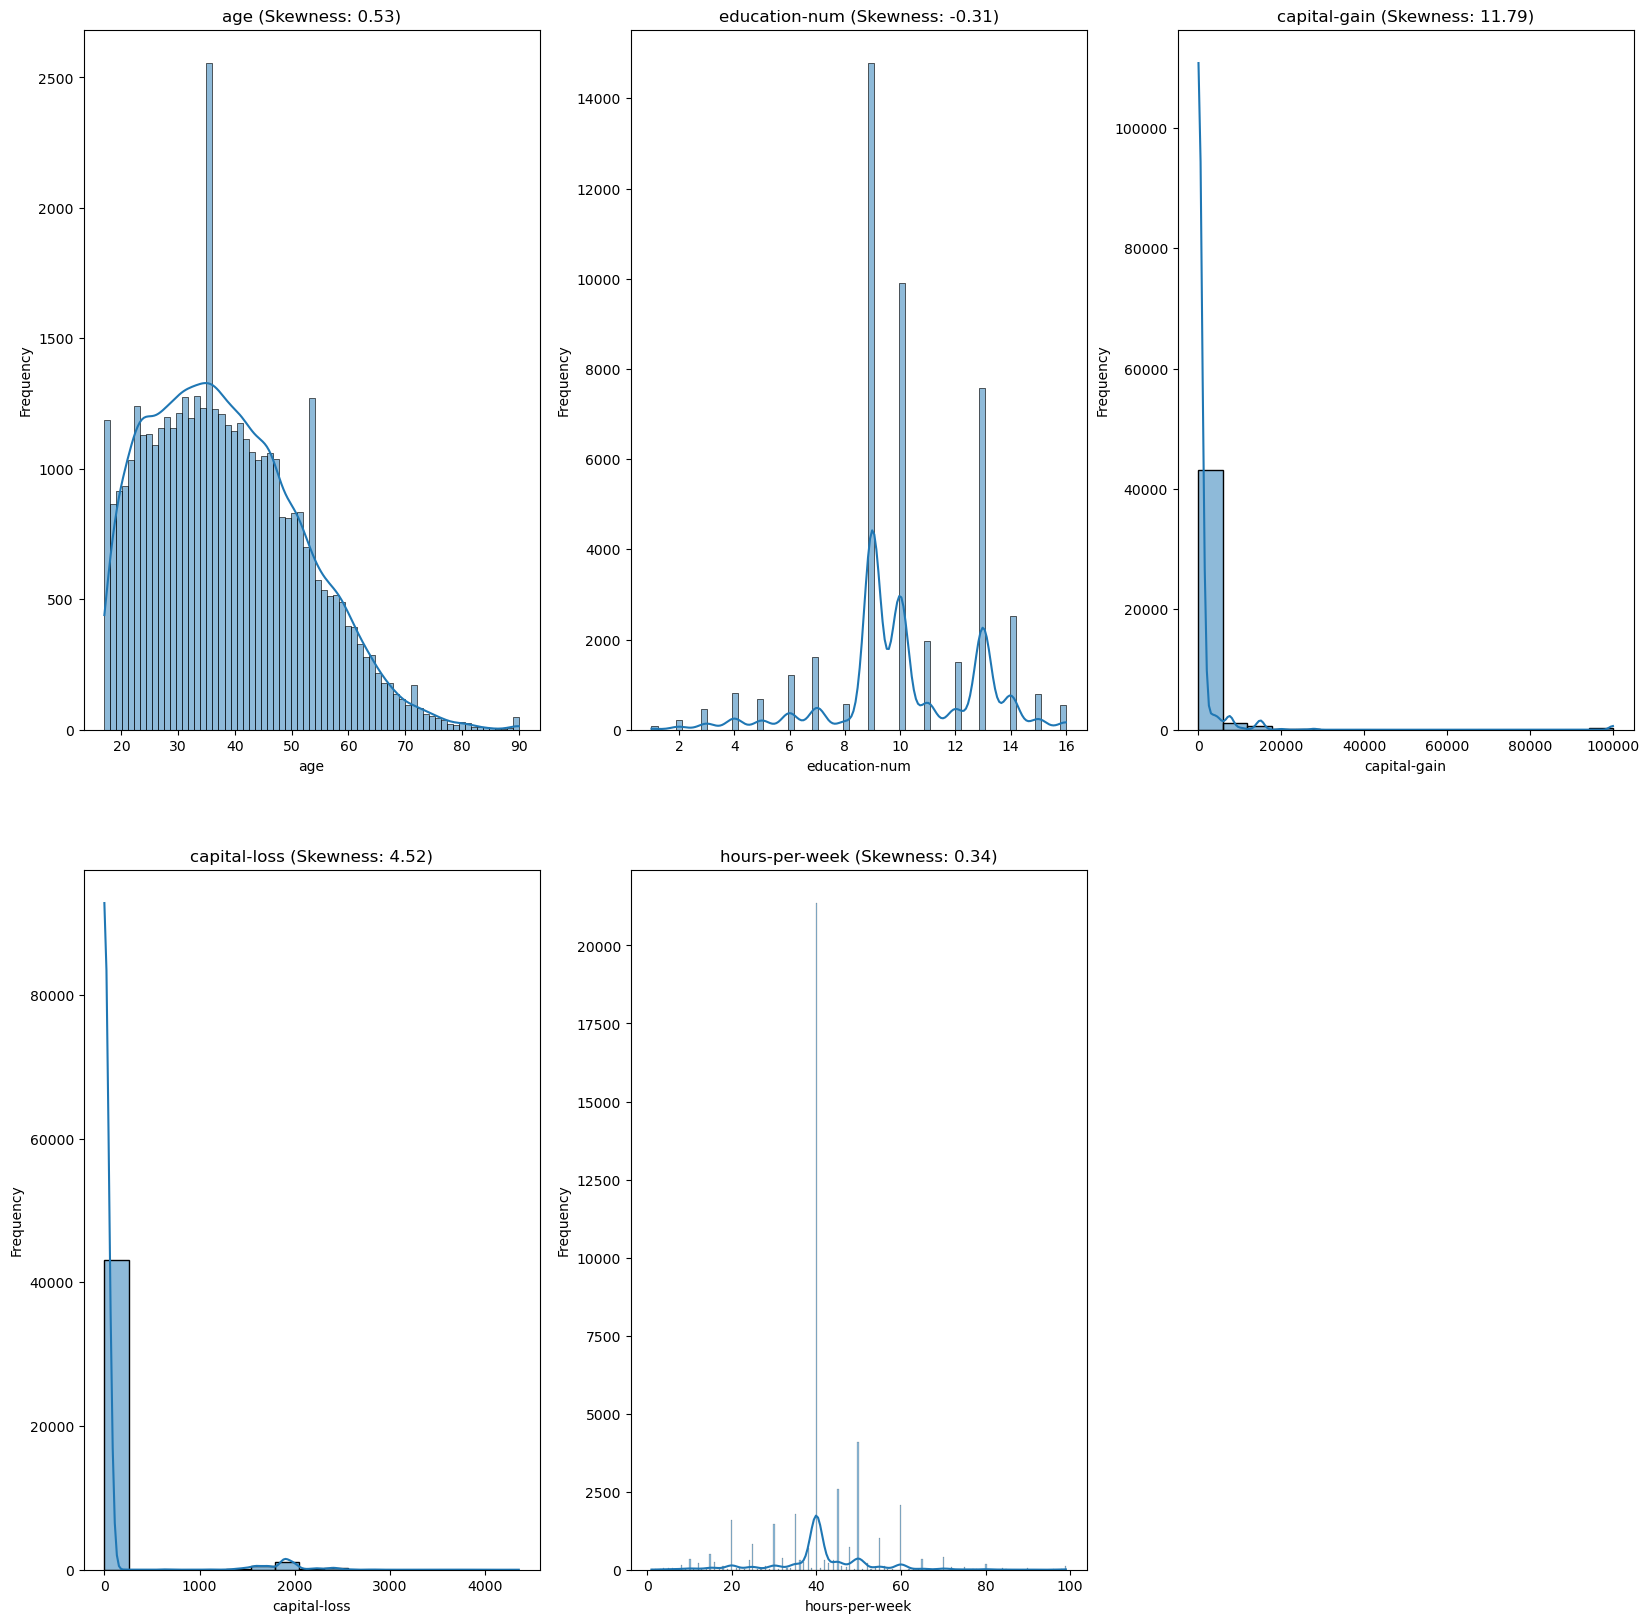

In [53]:
plt.figure(figsize=[20, 20])
for i in range(len(numeric.columns)):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(data[numeric.columns[i]], kde=True)  
    skew = data[numeric.columns[i]].skew()
    plt.title(f"{numeric.columns[i]} (Skewness: {skew:.2f})") 
    plt.xlabel(numeric.columns[i])  
    plt.ylabel("Frequency")  

In [7]:
data[["capital-gain" ,"capital-loss"]] = np.log1p(data[["capital-gain" ,"capital-loss"]])

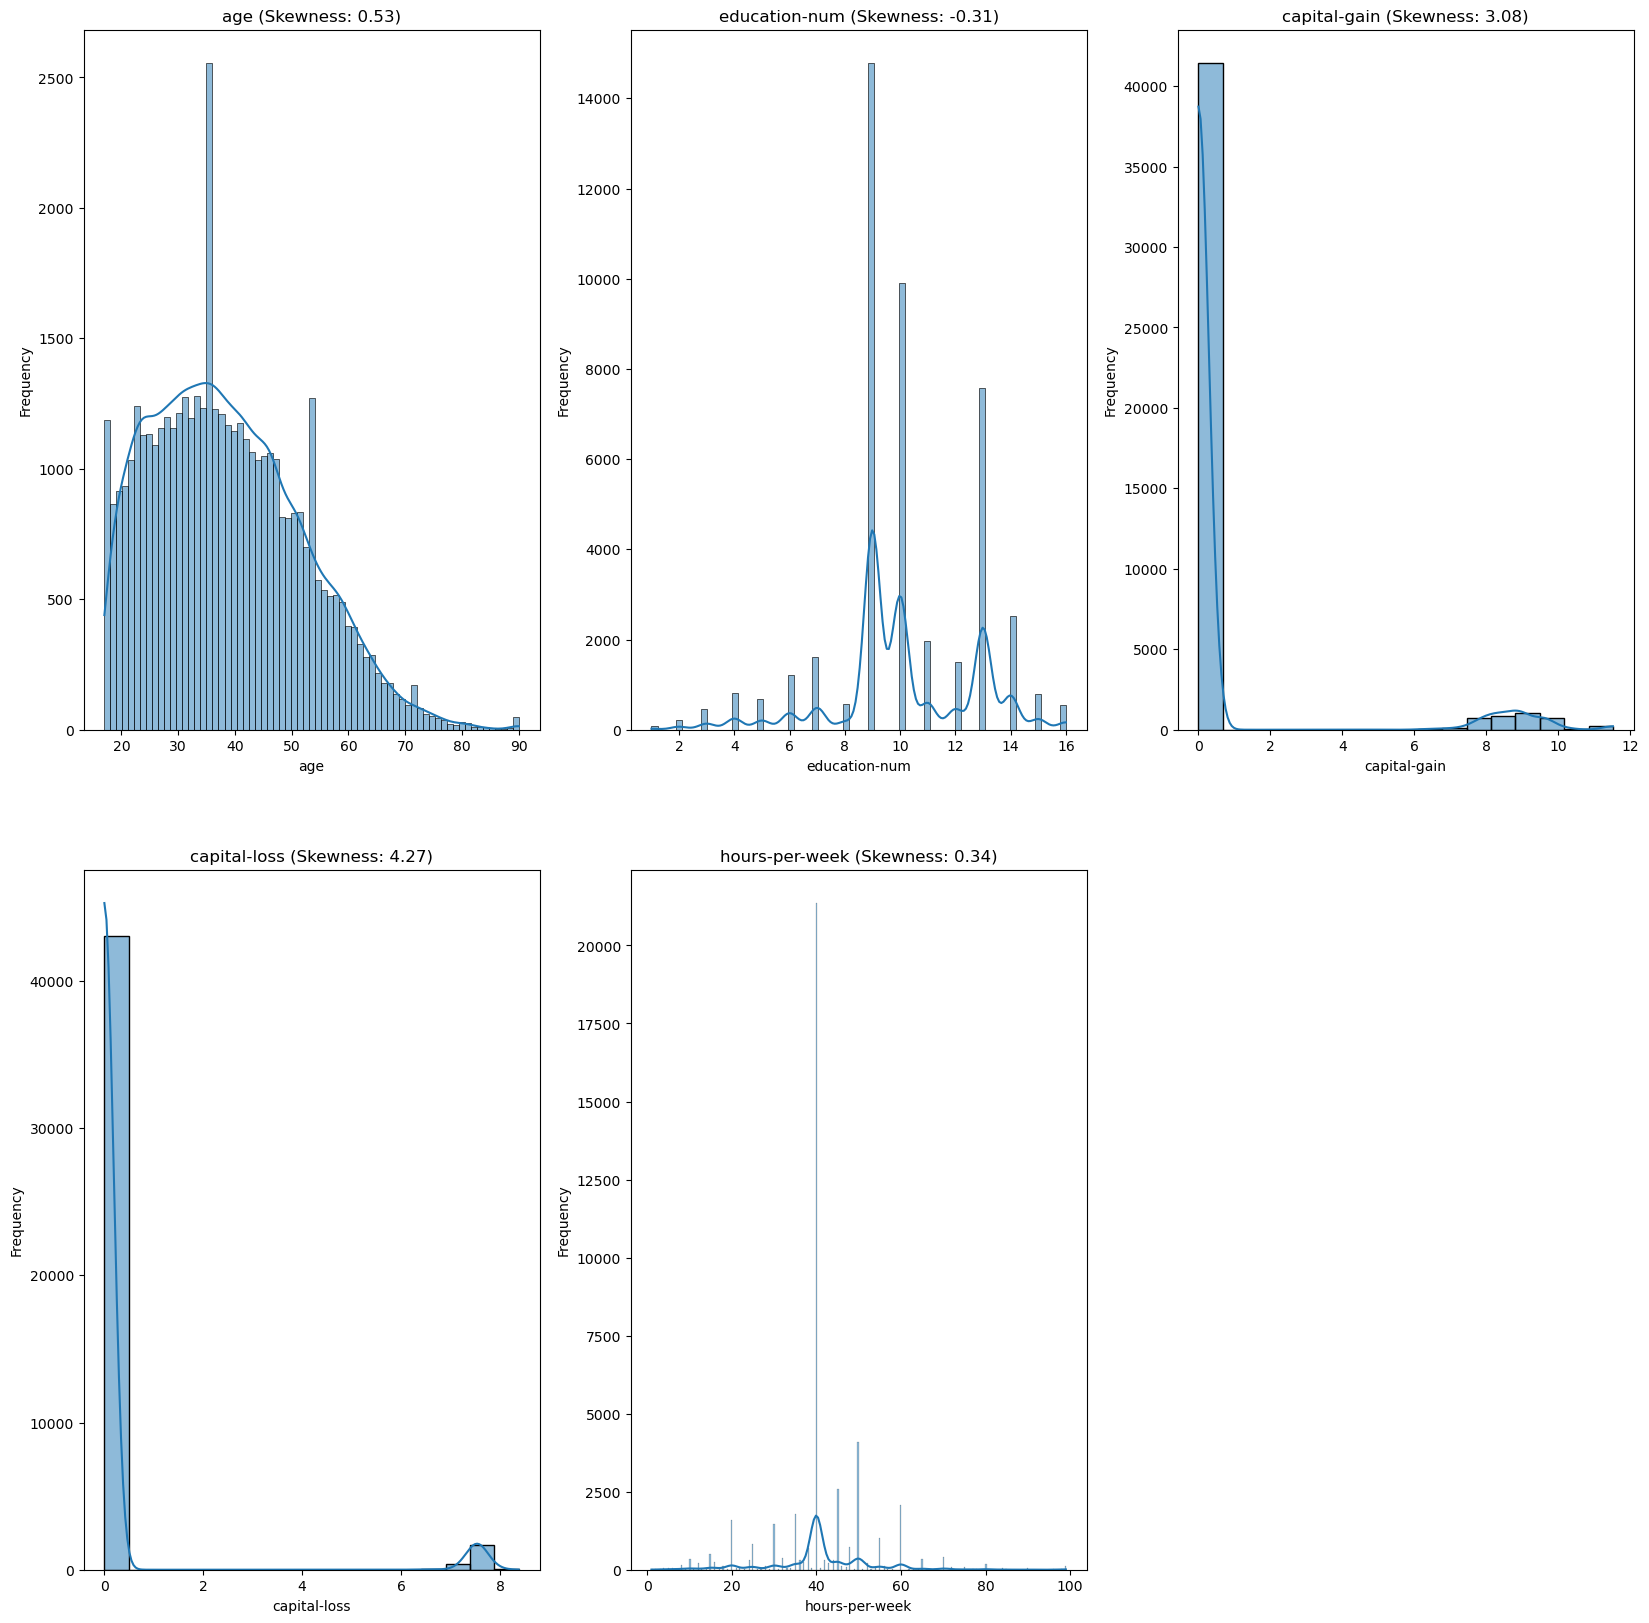

In [55]:
plt.figure(figsize=[20, 20])
for i in range(len(numeric.columns)):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(data[numeric.columns[i]], kde=True)  
    skew = data[numeric.columns[i]].skew()
    plt.title(f"{numeric.columns[i]} (Skewness: {skew:.2f})") 
    plt.xlabel(numeric.columns[i])  
    plt.ylabel("Frequency")  

## Scailing

In [8]:
scaler = MinMaxScaler()
data[numeric.columns] = scaler.fit_transform(data[numeric.columns])

In [57]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0


## Encoding

In [9]:
data = pd.get_dummies(data , dtype = "int")

In [10]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Kmean Cluster Porcess

In [11]:
X = np.array(data)
X

array([[0.30136986, 0.8       , 0.66749185, ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.28767123, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.36986301, 0.8       , 0.74737487, ..., 1.        , 0.        ,
        0.        ],
       [0.24657534, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

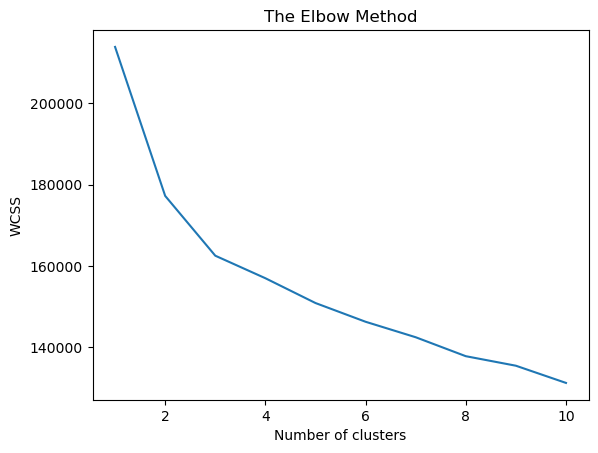

In [13]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):#try to test k=1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#kmeans.inertia_   get the wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(len(y_kmeans))
y_kmeans

45222


array([1, 0, 1, ..., 0, 1, 0])

In [15]:
cluster=pd.Series(data=y_kmeans)
cluster

0        1
1        0
2        1
3        3
4        2
        ..
45217    1
45218    2
45219    0
45220    1
45221    0
Length: 45222, dtype: int32

In [16]:
data["cluster"] = cluster

In [17]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,cluster
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
45218,0.301370,0.800000,0.000000,0.0,0.357143,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
45219,0.287671,0.800000,0.000000,0.0,0.500000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


# Data Splitting

In [18]:
y = data["income"]
X = data.drop("income" , axis = 1)

print(y)
X.head()

0        0

1        0

2        0

3        0

4        0

        ..

45217    0

45218    0

45219    0

45220    0

45221    1

Name: income, Length: 45222, dtype: int32


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,cluster
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

## Preformance Metrics

In [22]:
from sklearn.metrics import accuracy_score

def performance(y_true , y_predict):
    score = accuracy_score(y_true , y_predict)
    
    return score

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , f1_score , fbeta_score

model = DecisionTreeClassifier(random_state=42 , max_depth=6,min_samples_leaf=6, min_samples_split=2)

model.fit(X_train , y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

train_f = f1_score(y_train, train_pred)
test_f = f1_score(y_test, test_pred)

train_fb = fbeta_score(y_train, train_pred , beta = 0.5)
test_fb = fbeta_score(y_test, test_pred , beta = 0.5)

print("The Training Accuracy Is : " , train_acc)
print("The Testing Accuracy Is : " , test_acc)

print("The Training f1-score Is : " , train_f)
print("The Testing f1-score Is : " , test_f)

print("The Training fb-score Is : " , train_fb)
print("The Testing fb-score Is : " , test_fb)

The Training Accuracy Is :  0.8897089310888133

The Testing Accuracy Is :  0.8907683803206191

The Training f1-score Is :  0.7527268220128905

The Testing f1-score Is :  0.7610062893081762

The Training fb-score Is :  0.8028820729772608

The Testing fb-score Is :  0.8162100456621005


## AdaBoost (Best Model)

In [25]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier

def fit_model(X , y):
    clf = AdaBoostClassifier(random_state=42)

    parameters = {'learning_rate':[0.3],'n_estimators':[18], 'base_estimator':[DecisionTreeClassifier(random_state=42)],'base_estimator__max_depth':[6],'base_estimator__min_samples_leaf':[6],'base_estimator__min_samples_split':[2]}
    cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)

    scorer = make_scorer(performance)

    grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

    grid_fit = grid_obj.fit(X, y)

    return grid_fit.best_estimator_

In [26]:
clf = fit_model(X_train , y_train)

In [29]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

train_f = f1_score(y_train, train_predict)
test_f = f1_score(y_test, test_predict)

train_fb = fbeta_score(y_train, train_predict , beta = 0.5)
test_fb = fbeta_score(y_test, test_predict , beta = 0.5)

print("The Training Accuracy Is : " , train_acc)
print("The Testing Accuracy Is : " , test_acc)

print("The Training f1-score Is : " , train_f)
print("The Testing f1-score Is : " , test_f)

print("The Training fb-score Is : " , train_fb)
print("The Testing fb-score Is : " , test_fb)

The Training Accuracy Is :  0.907924924675899

The Testing Accuracy Is :  0.9046987285793255

The Training f1-score Is :  0.7986946274249108

The Testing f1-score Is :  0.7975575387505871

The Training fb-score Is :  0.8372187309953375

The Testing fb-score Is :  0.8379392025266482


## SVM

In [73]:
from sklearn.svm import SVC

model = SVC(C=0.7,kernel='poly',degree=3,random_state=42)

model.fit(X_train , y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("The Training Accuracy Is : " , train_acc)
print("The Training Accuracy Is : " , test_acc)

The Training Accuracy Is :  0.880504187743594

The Training Accuracy Is :  0.8772802653399668


# SVC GridSearch

In [74]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit

def fit_model(X , y):
    clf = SVC(random_state=42)

    parameters = {'C':[0.01,0.1,0.4,1,1.2],'kernel':['rbf'], 'gamma':[0.01,0.1,0.4,1,1.2]}
    cv_sets=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None)

    scorer = make_scorer(performance)

    grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

    grid_fit = grid_obj.fit(X, y)

    return grid_fit.best_estimator_

In [75]:
clf = fit_model(X_train , y_train)

In [76]:
print("Parameter 'C' is {} for the optimal model.".format(clf.get_params()['C']))
print("Parameter 'Kernel' is {} for the optimal model.".format(clf.get_params()['kernel']))
print("Parameter 'Gamma' is {} for the optimal model.".format(clf.get_params()['gamma']))

Parameter 'C' is 1 for the optimal model.

Parameter 'Kernel' is rbf for the optimal model.

Parameter 'Gamma' is 0.4 for the optimal model.


In [77]:
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.4, random_state=42)

# Model Evaluation

In [78]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

trainf_score = f1_score(y_train , train_predict)
testf_score = f1_score(y_test , test_predict)

print("Accuracy Score : ")
print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

print("F1 Score : ")
print("The Train Score Is : " , trainf_score)
print("The Test Score Is : " , testf_score)

Accuracy Score : 

The Train Score Is :  0.8949885286231584

The Test Score Is :  0.880375898286346

F1 Score : 

The Train Score Is :  0.7706887185368504

The Test Score Is :  0.7401536983669549
